TO-DO:
1. Find the most suitable Neighbour Joining output format in order to be converted to linkage matrix.
2. Develop the conversion function between let's say Newick format and Linkage matrix
3. Run POLO on such a matrix and visualise it.

In [4]:
import numpy as np
from skbio import DistanceMatrix
from skbio.tree import nj

%matplotlib inline

from math import atan2, pi
from random import randint

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform

from neighborjoining.neighbor_joining import (run_neighbor_joining, make_rooted,
                                              get_points_radial, get_points_circular, get_children)

Inferring phylogenetic tree from sample data by using `Neighbour joining` algorithm implemented in 
1. __[skbio.tree](http://scikit-bio.org/docs/0.2.0/tree.html)__ 
2. __[Jure's Steblaj implementation](http://eprints.fri.uni-lj.si/3899/1/63140259-JURIJ_%C5%A0TEBLAJ-Metoda_razvr%C5%A1%C4%8Danja_z_zdru%C5%BEevanjem_najbli%C5%BEjih_sosedov_v_programu_Orange-2.pdf)__  

In [5]:
# Distance matrix
distances = np.array([[0, 5, 9, 9, 8],
              [5, 0, 10, 10, 9],
              [9, 10, 0, 8, 7],
              [9, 10, 8, 0, 3],
              [8, 9, 7, 3, 0]])

distances_1 = np.array([[0, 5, 4, 7, 6, 8],
                       [5, 0, 7,10, 9,11],
                        [4, 7, 0, 7, 6, 8],
                       [7,10, 7, 0, 5, 9],
                       [6, 9, 6, 5, 0, 8 ],
                       [8,11, 8, 9, 8, 0]])
indexes = list('abcdef')

### Skbio.tree NJ implementation

In [6]:
distance_matrix = DistanceMatrix(distances_1,indexes)

In [7]:
# Phylogenetic tree represented in Newick format
newick_tree = nj(distance_matrix,result_constructor=str)
newick_tree

'((c:2.000000, (b:4.000000, a:1.000000):1.000000):1.000000, (e:2.000000, d:3.000000):1.000000, f:5.000000);'

In [192]:
newick_tree = nj(distance_matrix)
print(newick_tree.ascii_art())

                    /-c
          /--------|
         |         |          /-b
         |          \--------|
         |                    \-a
---------|
         |          /-e
         |---------|
         |          \-d
         |
          \-f


### Jure's Steblaj implementation

In [22]:
def plot(tree, points, labels=[], classes=None):
    for v1 in tree:
        for v2 in get_children(tree, v1):
            plt.plot((points[v1][0], points[v2][0]), (points[v1][1], points[v2][1]), 'k')
            if v2 < len(labels):
                delta = points[v2] - points[v1]
                angle = atan2(delta[1], delta[0])*180/pi
                angle = (angle + 360) % 360
                if angle > 90 and angle < 270:
                    alignment = "right"
                else:
                    alignment = "left"
                if angle < 90:
                    pass
                elif angle < 180:
                    pass
                elif angle < 270:
                    pass
                else:
                    pass
                if angle < 45:
                    va = "center"
                elif angle < 135:
                    va = "bottom"
                elif angle < 225:
                    va = "center"
                elif angle < 315:
                    va = "top"
                else:
                    va = "center"

                if angle > 90 and angle < 270:
                    rotation = (angle + 180) % 360
                else:
                    rotation = angle
                plt.text(*points[v2], labels[v2], rotation=rotation,
                         va=va, clip_on=True, ha=alignment)

    if classes != None:
        for c in classes:
            plt.plot([points[x][0] for x in c], [points[x][1] for x in c], ".", ms=3)

    # plt.savefig("output.svg")
    plt.show()

In [197]:
# Unrooted phylogenetic tree inferred from distance matrix
unrooted_tree = run_neighbor_joining(distances_1)
unrooted_tree

# Conversion to rooted phylogenetic tree 
rooted_tree = make_rooted(unrooted_tree)

In [198]:
# Inferring radial points to be plotted
radial_points = get_points_radial(rooted_tree)
labels = radial_points.keys()

In [199]:
unrooted_tree

{1: [[6, 4.0]],
 0: [[6, 1.0]],
 6: [[1, 4.0], [0, 1.0], [7, 1.0]],
 2: [[7, 2.0]],
 7: [[6, 1.0], [2, 2.0], [9, 1.0]],
 4: [[8, 2.0]],
 3: [[8, 3.0]],
 8: [[4, 2.0], [3, 3.0], [9, 1.0]],
 5: [[9, 5.0]],
 9: [[7, 1.0], [5, 5.0], [8, 1.0]]}

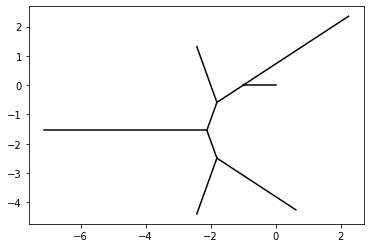

In [195]:
plot(rooted_tree,radial_points)

Newick format:
http://marvin.cs.uidaho.edu/Teaching/CS515/newickFormat.html

TO-DO
1. Since a tree produced in Newick format is a string, make a newick_parser and then make a converter to linkage matrix

In [ ]:
# https://github.com/kgori/newick/blob/master/newick.py

In [1]:
# # (d:2.000000, (c:4.000000, (b:3.000000, a:2.000000):3.000000):2.000000, e:1.000000);
# def newick_parser_json(newick_tree:str):
#     tree = {}
#     ancestors = []
#     linkage_matrix = []
#     pattern = re.compile(r'\s+')
#     newick_tree = re.sub(pattern, '', newick_tree)
#     tokens = re.split(r"\s*(;|\(|\)|\[|\]|,|:|=)\s*",newick_tree)
#     tokens = [token for token in tokens if token != '' or token != ';']
#     print(newick_tree)
#     for ind,token in enumerate(tokens):
#         if token == '(': 
# #             print("Step %d",ind)
# #             New children
#             subtree = {}
#             tree['children'] = [subtree]
# #             print("Tree",tree)
#             ancestors.append(tree)
#             tree=subtree
# #             print('Subtree',subtree)
# #             print('Ancestors',ancestors)
#             linkage_matrix.append([])
            
#         elif token == ',':
#             x = tokens[ind+1]
            
# #             print("Step %d",ind)
#             subtree = {}
# #             New branch
#             ancestors[len(ancestors)-1]['children'].append(subtree)
# #             print('Tree,',tree)
#             tree = subtree
#             linkage_matrix.append([])
            
# #             print('Subtree',subtree)
# #             print('Ancestors',ancestors)
        
#         elif token == ':':
#             continue
            
#         elif token == ')':
# #             print("Step %d",ind)
#             tree = ancestors.pop()
# #             print('Tree,',tree)
# #             print('Subtree',subtree)
# #             print('Ancestors',ancestors) 
            
#         else:
# #             print("Step %d",ind)
#             x = tokens[ind-1]
            
#             if x in (")","(",","):
#                 tree['name'] = token
#                 linkage_matrix[len(linkage_matrix)-1].append(token)
#             elif x == ':':
#                 tree['branch_length'] = token
# #             print('Tree,',tree)
# #             print('Subtree',subtree)
# #             print('Ancestors',ancestors)

#     return tree
                
    
            
            

        
    

In [165]:
tr = newick_parser_json("(3:2.0,(2:4.0,(1:3.0,0:2.0)5:3.0)6:2.0,4:1.0);")

(3:2.0,(2:4.0,(1:3.0,0:2.0)5:3.0)6:2.0,4:1.0);


In [152]:
tr

{'children': [{'name': '3', 'branch_length': '2.0'},
  {'name': '6',
   'children': [{'name': '2', 'branch_length': '4.0'},
    {'name': '5',
     'children': [{'name': '1', 'branch_length': '3.0'},
      {'name': '0', 'branch_length': '2.0'}],
     'branch_length': '3.0'}],
   'branch_length': '2.0'},
  {'name': '4', 'branch_length': '1.0'}],
 'name': ''}

In [40]:
import re
def newick_parser(newick_tree:str):
    linkage_matrix = []
    pattern = re.compile(r'\s+')
    newick_tree = re.sub(pattern, '', newick_tree)
    tokens = re.split(r"\s*(;|\(|\)|\[|\]|,|:|=)\s*",newick_tree)
    tokens = [token for token in tokens if token != '' and token != ';']
    count = 1
    for ind,token in enumerate(tokens):
        if token == "(" :
            linkage_matrix.append([])
        elif token ==',' and tokens[ind+1] == '(':
            continue
#             linkage_matrix.append([])
        elif token == ')':
            continue
        elif token == ':':
            continue
        else:
            x = tokens[ind-1]
            if x in ("(",","):
#                 print(linkage_matrix)
#                 print(x,token,len(linkage_matrix))
                linkage_matrix[len(linkage_matrix)-1].append(token)
            elif x == ')':
                count+=1
                linkage_matrix[len(linkage_matrix)-count].append(token)                
    return linkage_matrix
            
            

In [38]:
newick_parser('((2:2.000000, (1:4.000000, 0:1.000000)6:1.000000)7:1.000000, (4:2.000000, 3:3.000000)8:1.000000, 5:5.000000)9')

[['7', '8'], ['2', '6'], ['1', '0'], ['4', '3', '5', '9']]

In [42]:
newick_parser('(3:2.000000,(2:4.000000, (1:3.000000, 0:2.000000)5:3.000000)6:2.000000, 4:1.000000)7')

[['3', '6'], ['2', '5'], ['1', '0', '4', '7']]

#### TO DO 04.02.2021
1. Check if POLO can be generalized to accept non binary nodes
2. Maybe we can impute dummy nodes with distance = 0 in order to make it work 

Prof:
 1. Try to make POLO work, 
 2. Read and check https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1007347
 3. 